# Lecture 28 - Sample Size Examples

In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

In [2]:
baby = Table.read_table("baby.csv")
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


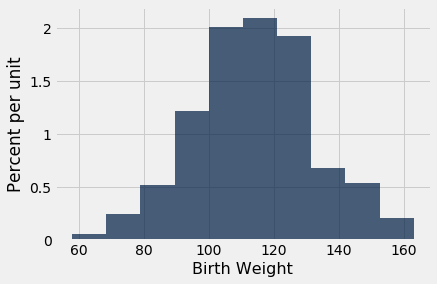

In [3]:
smoker = baby.where("Maternal Smoker", True)
smoker.hist("Birth Weight")

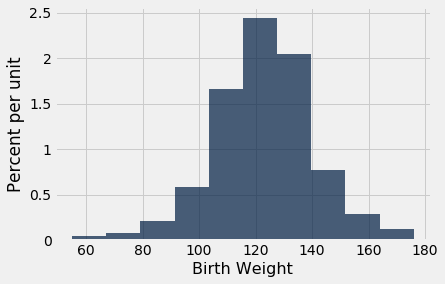

In [4]:
nonsmoker = baby.where("Maternal Smoker", False)
nonsmoker.hist("Birth Weight")

In [5]:
print("Mean smoker birth weight:", np.mean(smoker.column("Birth Weight")))
print("Mean nonsmoker birth weight:", np.mean(nonsmoker.column("Birth Weight")))
print("Birth weight std:", np.std(baby.column("Birth Weight")))

Mean smoker birth weight: 113.81917211328977
Mean nonsmoker birth weight: 123.08531468531469
Birth weight std: 18.32086370220278


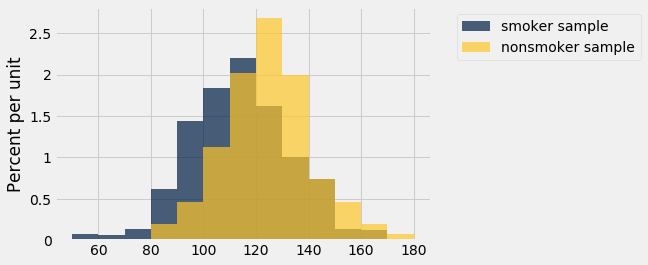

In [6]:
N = 500
smoker_samp = smoker.sample(N).column("Birth Weight")
nonsmoker_samp = nonsmoker.sample(N).column("Birth Weight")
Table().with_columns(
"smoker sample", smoker_samp,
"nonsmoker sample", nonsmoker_samp).hist(bins=np.arange(50, 190, 10))

## Confidence interval

Assuming normality, 95% confidence interval = [mean - 2std, mean + 2std]

In [7]:
smoker_mean = np.mean(smoker.column("Birth Weight"))
smoker_std = np.std(smoker.column("Birth Weight"))
nonsmoker_mean = np.mean(nonsmoker.column("Birth Weight"))
nonsmoker_std = np.std(nonsmoker.column("Birth Weight"))

In [8]:
print("95% of ___ are in the range:")
print("  smoker birth weight:   ", [smoker_mean - 2*smoker_std, smoker_mean + 2*smoker_std])
print("  nonsmoker birth weight:", [nonsmoker_mean - 2*nonsmoker_std, nonsmoker_mean + 2*nonsmoker_std])

95% of ___ are in the range:
  smoker birth weight:    [77.26903151046443, 150.3693127161151]
  nonsmoker birth weight: [88.26230197404561, 157.90832739658376]


In [9]:
print("95% confidence interval for:")
smoker_mean_sample_std = smoker_std / np.sqrt(smoker.num_rows)
nonsmoker_mean_sample_std = nonsmoker_std / np.sqrt(nonsmoker.num_rows)
print("  mean smoker birth weight:", [smoker_mean - 2*smoker_mean_sample_std, smoker_mean + 2*smoker_mean_sample_std])
print("  mean nonsmoker birth weight:", [nonsmoker_mean - 2*nonsmoker_mean_sample_std, nonsmoker_mean + 2*nonsmoker_mean_sample_std])

95% confidence interval for:
  mean smoker birth weight: [112.11315764813777, 115.52518657844176]
  mean nonsmoker birth weight: [121.7830078486176, 124.38762152201177]


# What if our sample size were smaller?

In [10]:
N = 60
print("Predicted 95% confidence interval for:")
print("  mean smoker birth weight ( N =", N,"):   ", [smoker_mean - 2*smoker_std/np.sqrt(N), smoker_mean + 2*smoker_std/np.sqrt(N)])
print("  mean nonsmoker birth weight ( N =", N,"):", [nonsmoker_mean - 2*nonsmoker_std/np.sqrt(N), nonsmoker_mean + 2*nonsmoker_std/np.sqrt(N)])

Predicted 95% confidence interval for:
  mean smoker birth weight ( N = 60 ):    [109.1005692514137, 118.53777497516583]
  mean nonsmoker birth weight ( N = 60 ): [118.58968307546421, 127.58094629516516]


What does this mean? Supposing that the population mean and std we are using are correct,

* If we take a sample of 60 smokers, 97.5% of time, sample mean will be < 118.55
* If we take a sample of 60 nonsmokers, 97.5% of time, sample mean will be > 118.55
* So if smoker interval < nonsmoker interval, then at least 95% of time, smoker sample mean < nonsmoker sample mean

# Let's check that these estimates are about right

Why might they not be right?
* Distribution might not be normal
* Formulas from class might be wrong
* We might not be applying formulas correctly

How to check?
* Resample!

In [11]:
def sample_means(arr, N, rep=300):
    """Sample N samples from the array arr and compute the sample mean. 
       Do this rep times and return the list of means."""
    means = []
    for i in range(rep):
        sample_mean = np.mean(np.random.choice(arr, size=N))
        means = np.append(sample_mean, means)
    return means

def conf_int(arr, p=95):
    """Return a 95% confidence interval for the empirical distribution of values in array arr"""
    return [percentile((100-p)/2, arr), percentile(p-(100-p)/2, arr)]

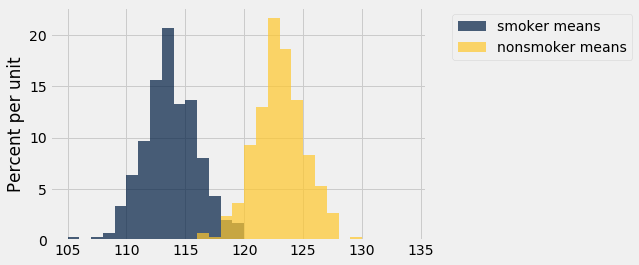

In [12]:
N = 60
smoker_means = sample_means(smoker.column("Birth Weight"), N)
nonsmoker_means = sample_means(nonsmoker.column("Birth Weight"), N)
Table().with_columns(
"smoker means", smoker_means,
"nonsmoker means", nonsmoker_means).hist(bins=np.arange(105, 135))

In [13]:
N = 60
smoker_conf_int = conf_int(smoker_means, 95)
nonsmoker_conf_int = conf_int(nonsmoker_means, 95)
print("Empirical 95% confidence interval for:")
print("  mean smoker birth weight (N =", N,"):   ", smoker_conf_int)
print("  mean nonsmoker birth weight (N =", N,"):", nonsmoker_conf_int)

Empirical 95% confidence interval for:
  mean smoker birth weight (N = 60 ):    [109.45, 117.08333333333333]
  mean nonsmoker birth weight (N = 60 ): [118.51666666666667, 126.13333333333334]


In [14]:
# Compare with predictions
print("Predicted 95% confidence interval for:")
print("  mean smoker birth weight (N =", N,"):   ", [smoker_mean - 2*smoker_std/np.sqrt(N), smoker_mean + 2*smoker_std/np.sqrt(N)])
print("  mean nonsmoker birth weight (N =", N,"):", [nonsmoker_mean - 2*nonsmoker_std/np.sqrt(N), nonsmoker_mean + 2*nonsmoker_std/np.sqrt(N)])

Predicted 95% confidence interval for:
  mean smoker birth weight (N = 60 ):    [109.1005692514137, 118.53777497516583]
  mean nonsmoker birth weight (N = 60 ): [118.58968307546421, 127.58094629516516]
